# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier , ExtraTreesClassifier ,HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## My Dataset 

In [2]:
telco = pd.read_csv(r"C:\Users\Yousof Saleh\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <h1>Exploring the data <h1>

## Shape of the data 

In [3]:
print('Number of rows is : ' ,telco.shape[0])
print('Number of columns is : ' ,telco.shape[1])

Number of rows is :  7043
Number of columns is :  21


## showing the info of the data

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Number of duplicates

In [5]:
print('Number of duplicates is :' ,telco.duplicated().sum())

Number of duplicates is : 0


## Checking if there is customers with the same Id

In [6]:
telco['customerID'].duplicated().sum()

0

## Cheching the duplicates after removing the ID column 

In [7]:
telco.drop('customerID',axis=1 , inplace = True)
print('Number of duplicates after removing (ID) is :' , telco.duplicated().sum())

Number of duplicates after removing (ID) is : 22


In [8]:
telco.drop_duplicates(inplace=True)
print('Number of duplicates now is :' , telco.duplicated().sum())

Number of duplicates now is : 0


## checking the number of NaN values in the data

In [9]:
telco.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Describing Data 

In [10]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [11]:
telco.drop(['SeniorCitizen','tenure','MonthlyCharges'],axis=1).describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,11,5164


## Showing the unique values of categorical columns

In [12]:
for i in telco.columns:
    if telco[i].dtype == 'O':
        print(telco[i].value_counts())
        print('\n')

gender
Male      3541
Female    3480
Name: count, dtype: int64


Partner
No     3619
Yes    3402
Name: count, dtype: int64


Dependents
No     4911
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6339
No      682
Name: count, dtype: int64


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64


OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64


OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64


DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64


TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64


StreamingTV
No       

## let's change the type of "TotalCharges" from "object" to "float"

In [13]:
 telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [14]:
telco.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## fill nan value in the "TotalCharges" column 

In [15]:
telco["TotalCharges"].fillna(telco["tenure"]*telco["MonthlyCharges"],inplace=True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Now the column is well modiefied <hr>

## let's show the target percent of (yes, no)

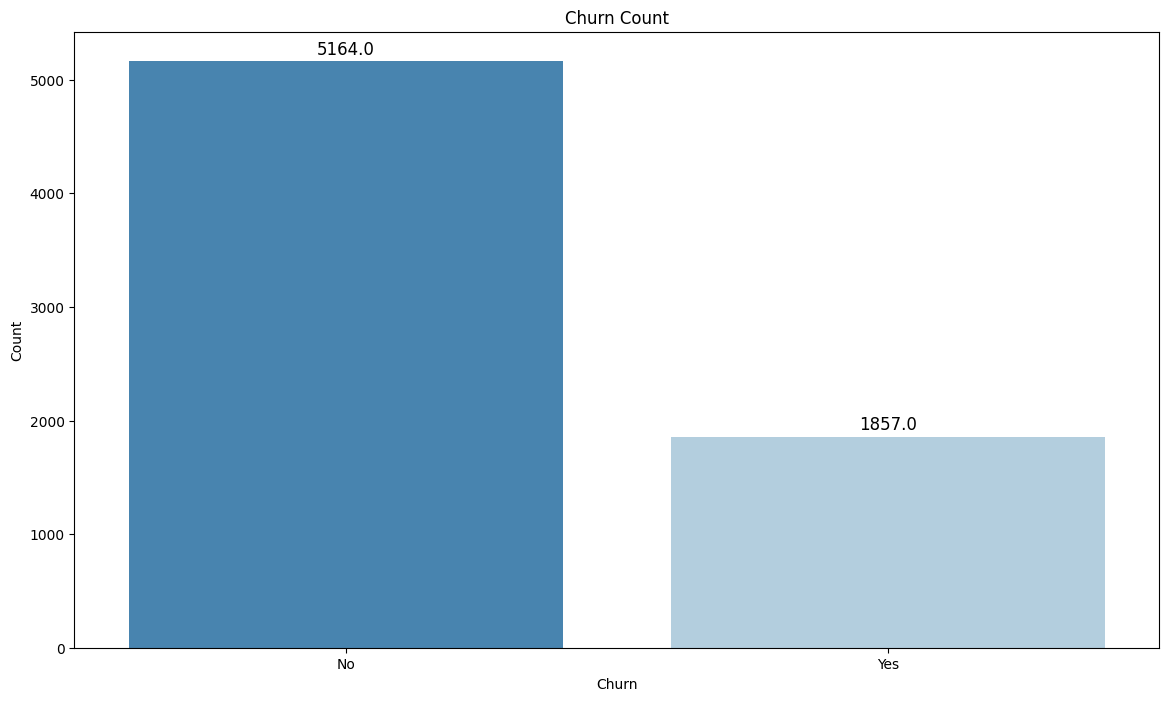

In [16]:
fig = plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Churn', data=telco, palette='Blues_r')

for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Now it is time to split the data to train and test

In [17]:
x = telco.drop('Churn',axis=1)
y = telco[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55


In [19]:
y_train.head()

,Churn
3276,Yes
6266,Yes
1324,Yes
5201,No
4080,No


## let's concate the (X_train,y_train) to do some visualizations

In [20]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25,Yes
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30,Yes
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60,No
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,No


# Now there is 4 continous columns

In [21]:
train_set.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5616.000000,5616.000000,5616.000000,5616.000000
mean,0.164530,32.358084,64.827030,2283.196554
std,0.370789,24.395826,30.165926,2264.808153
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,402.600000
50%,0.000000,29.000000,70.300000,1399.825000
75%,0.000000,55.000000,90.100000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


## After treating the columns of the data let's visualize the categorical columns

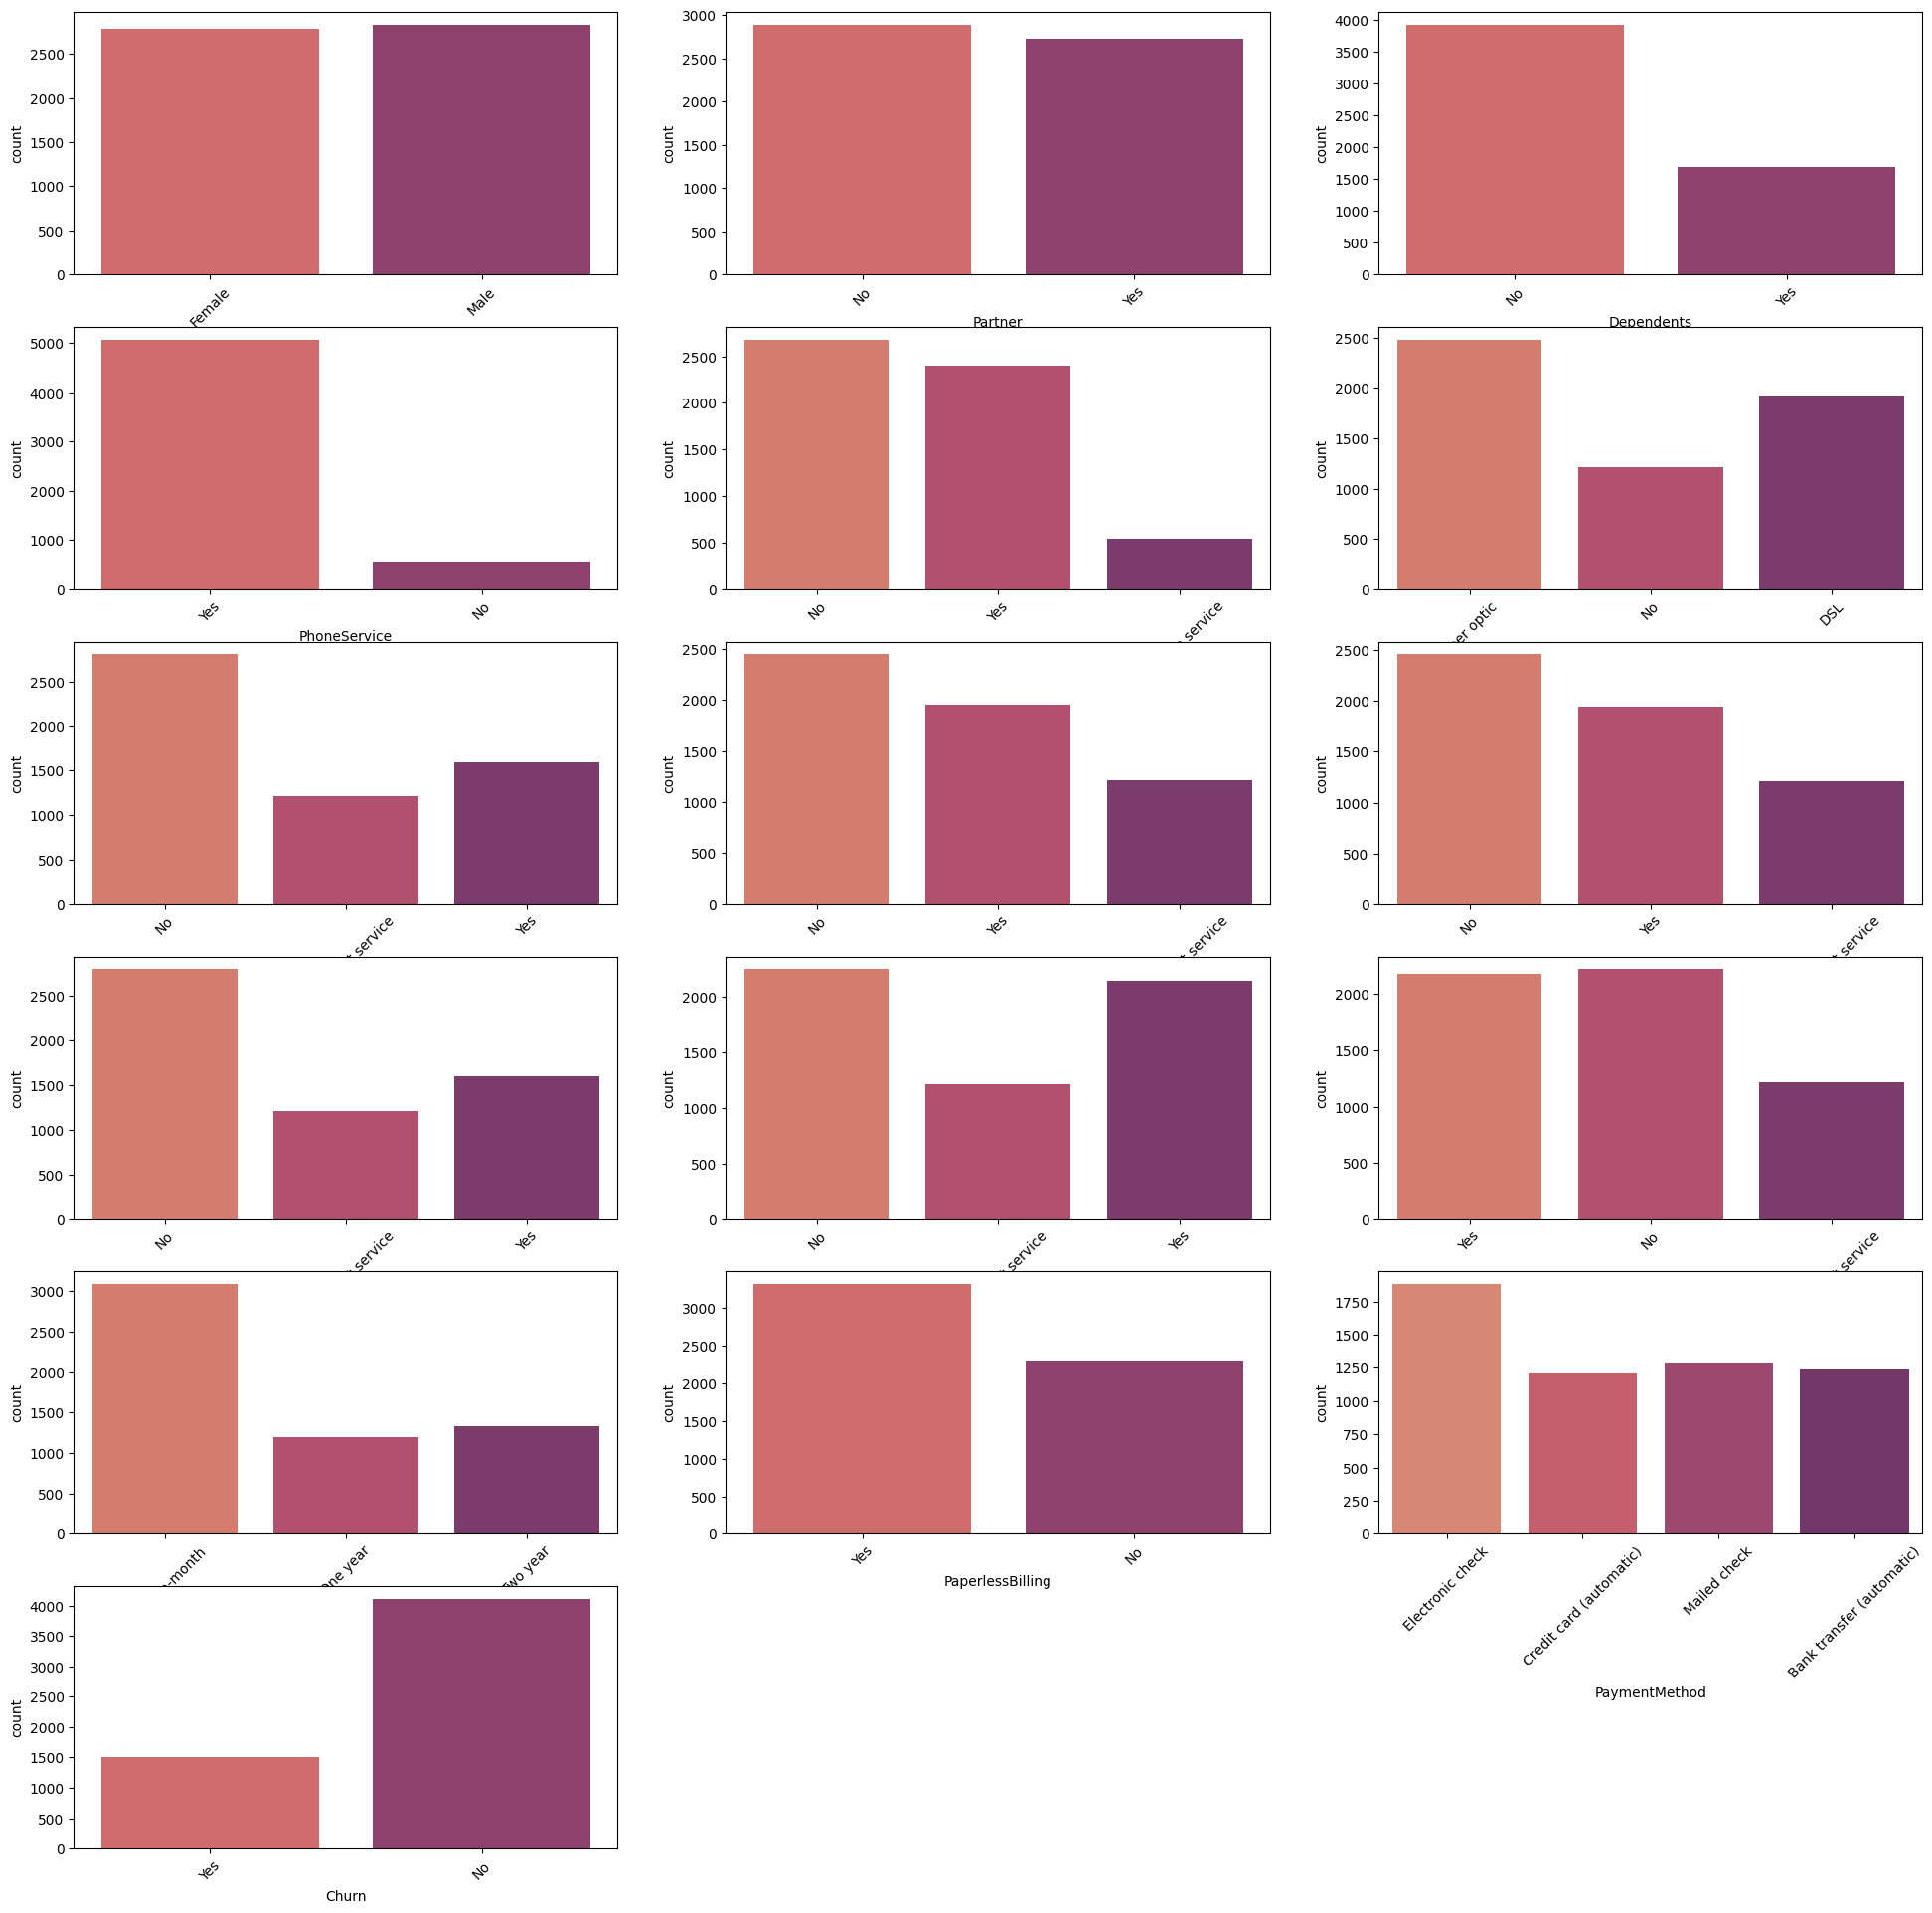

In [22]:
fig = plt.figure(figsize=(24,24))

lol = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object':
        sub = fig.add_subplot(6,3,lol+1)
        sns.countplot(x=i,data=train_set,palette = 'flare')
        lol = lol + 1
        plt.xticks(rotation=45)

## lets visualize the columns with the target column

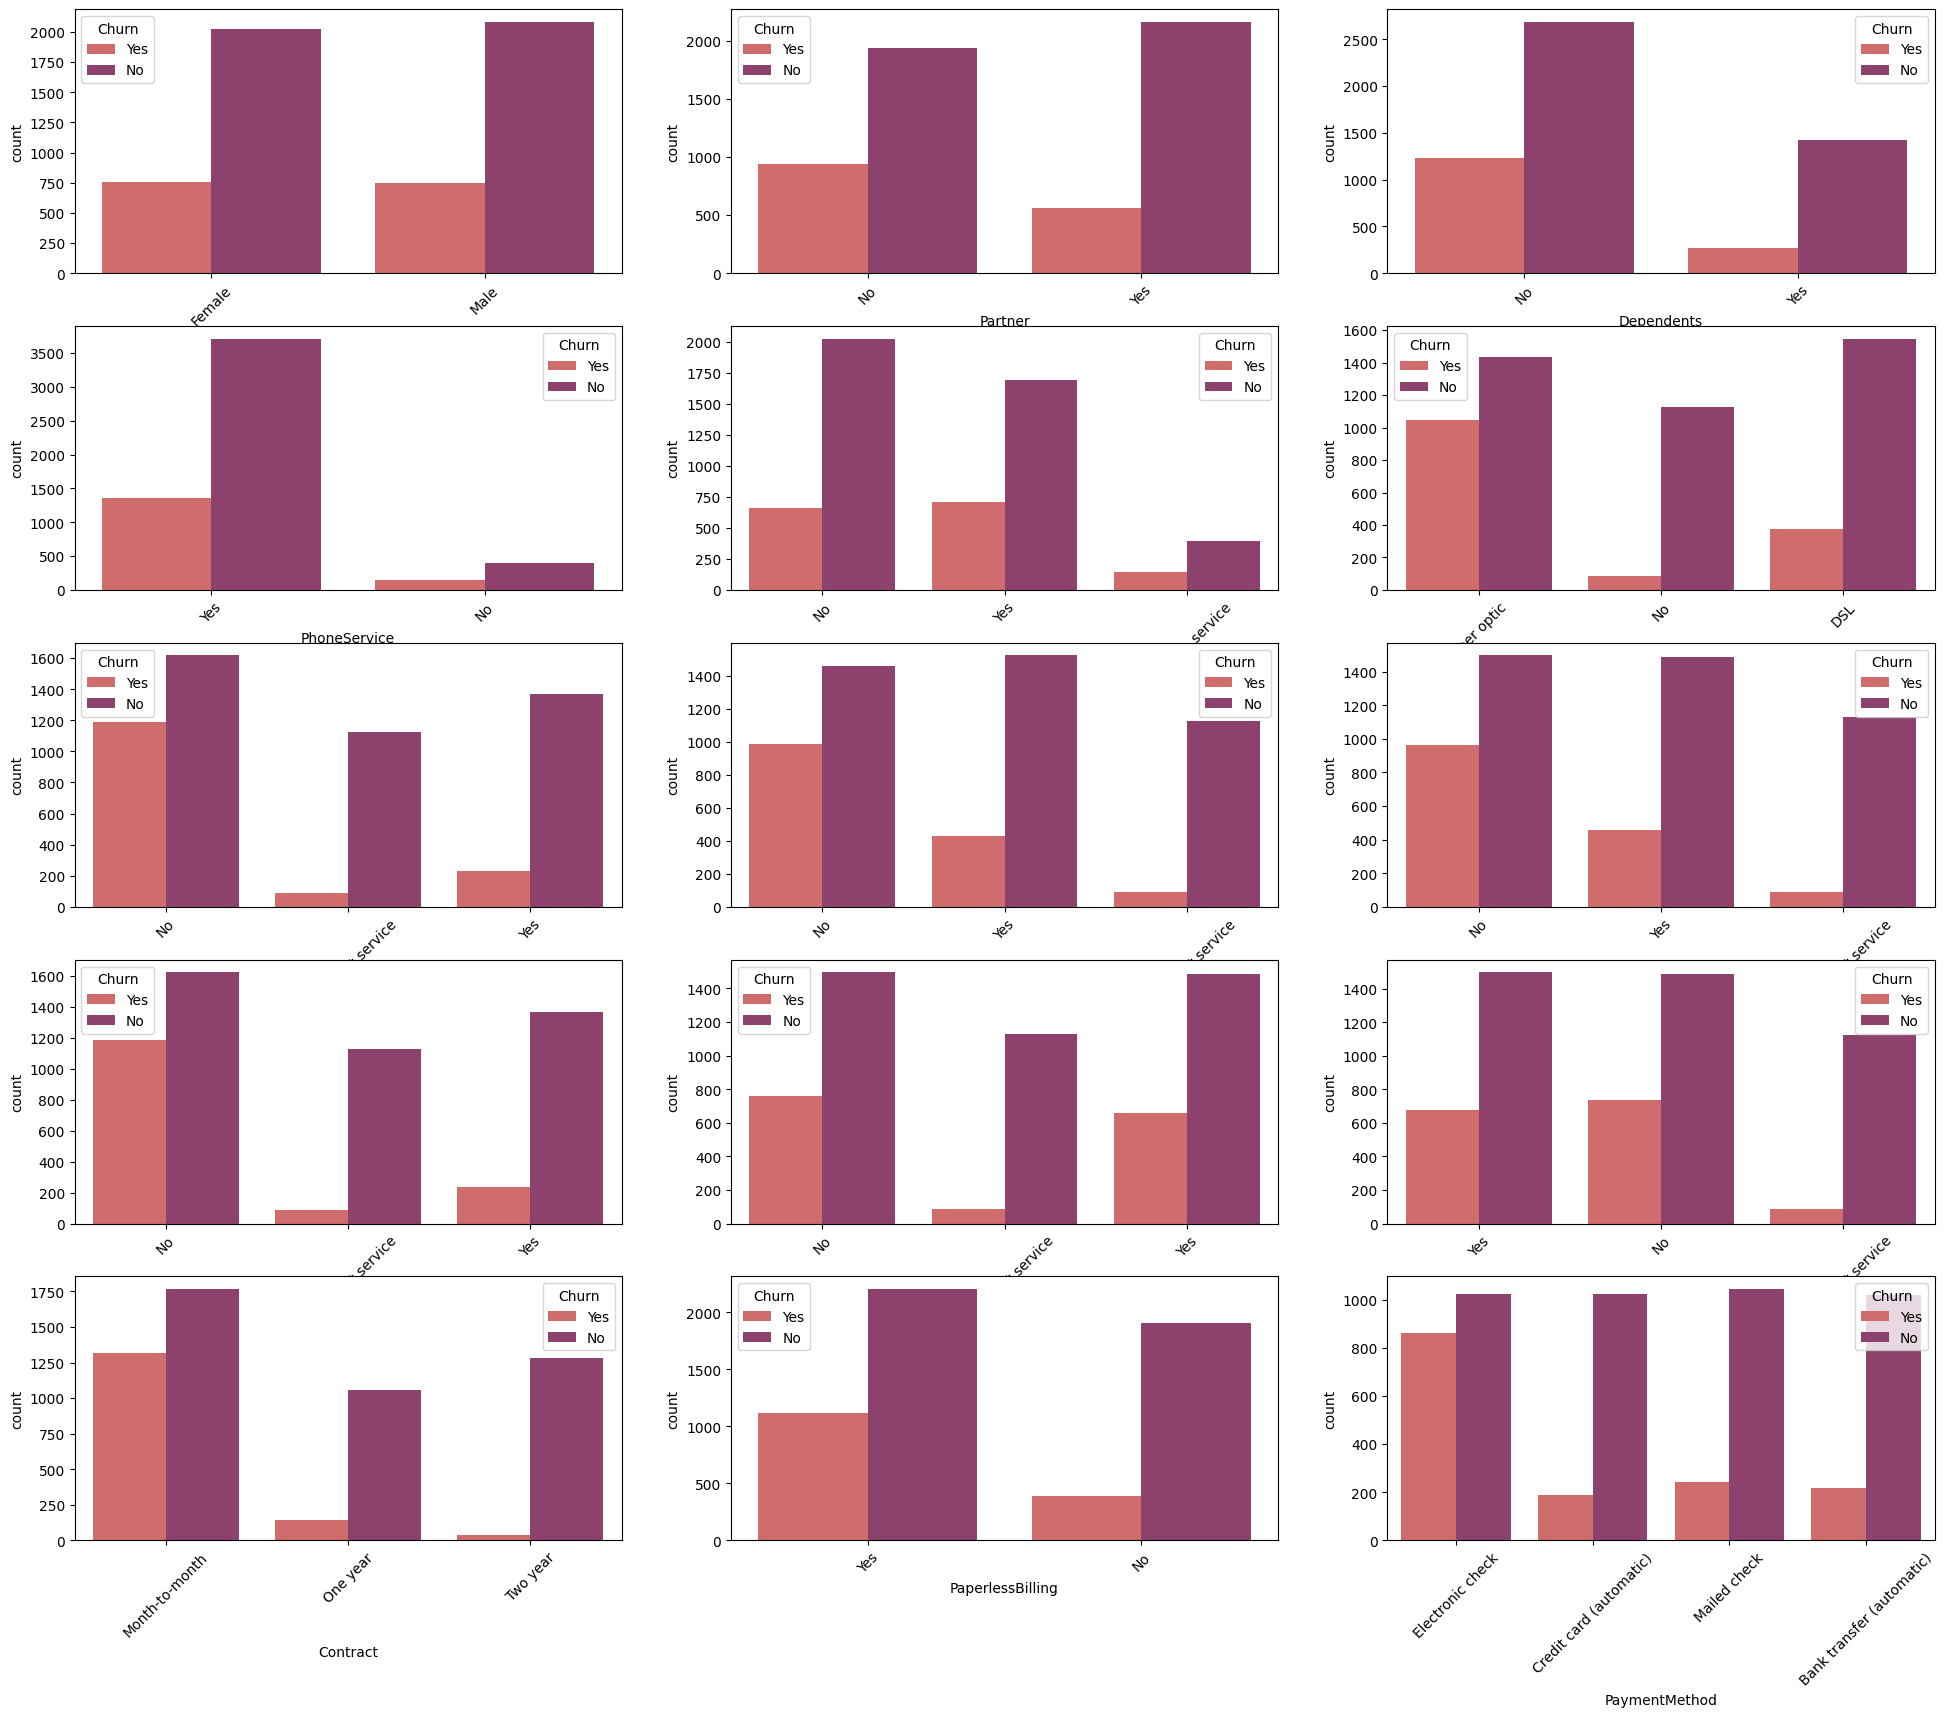

In [23]:
fig = plt.figure(figsize=(24,24))

lol = 0

for i in train_set.columns:
    if train_set[i].dtype == 'object' and i !='Churn':
        sub = fig.add_subplot(6,3,lol+1)
        sns.countplot(x=i,data=train_set,palette = 'flare',hue='Churn')
        lol = lol + 1
        plt.xticks(rotation=45)

## Lets now know more about continous data

In [24]:
for i in train_set.columns:
    if train_set[i].dtype != 'object':
        print('\nNumber of unique data in the {} is : '.format(i),len(train_set[i].unique()))        


Number of unique data in the SeniorCitizen is :  2

Number of unique data in the tenure is :  73

Number of unique data in the MonthlyCharges is :  1486

Number of unique data in the TotalCharges is :  5286


## There is something important 'SeniorCitizen' has 2 unique values

In [25]:
train_set["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

## So i will change it to Object type of column

In [26]:
train_set['SeniorCitizen'] = train_set['SeniorCitizen'].astype('object')
print('Type of "SeniorCitizen" column now is : ',train_set['SeniorCitizen'].dtype)

Type of "SeniorCitizen" column now is :  object


In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5616 entries, 3276 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5616 non-null   object 
 1   SeniorCitizen     5616 non-null   object 
 2   Partner           5616 non-null   object 
 3   Dependents        5616 non-null   object 
 4   tenure            5616 non-null   int64  
 5   PhoneService      5616 non-null   object 
 6   MultipleLines     5616 non-null   object 
 7   InternetService   5616 non-null   object 
 8   OnlineSecurity    5616 non-null   object 
 9   OnlineBackup      5616 non-null   object 
 10  DeviceProtection  5616 non-null   object 
 11  TechSupport       5616 non-null   object 
 12  StreamingTV       5616 non-null   object 
 13  StreamingMovies   5616 non-null   object 
 14  Contract          5616 non-null   object 
 15  PaperlessBilling  5616 non-null   object 
 16  PaymentMethod     5616 non-null   object 
 17

## Lets show the distribution of continous data

<Figure size 640x480 with 0 Axes>

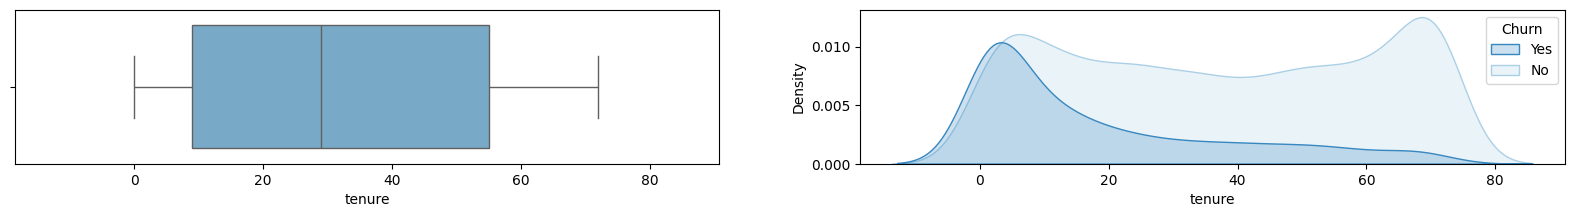

<Figure size 2000x200 with 0 Axes>

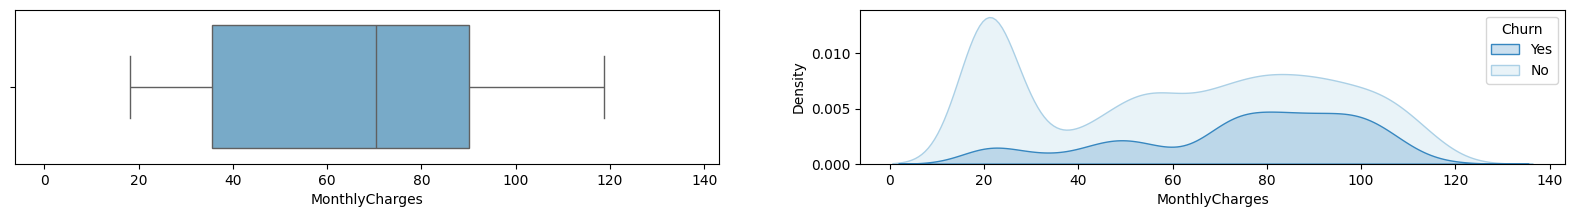

<Figure size 2000x200 with 0 Axes>

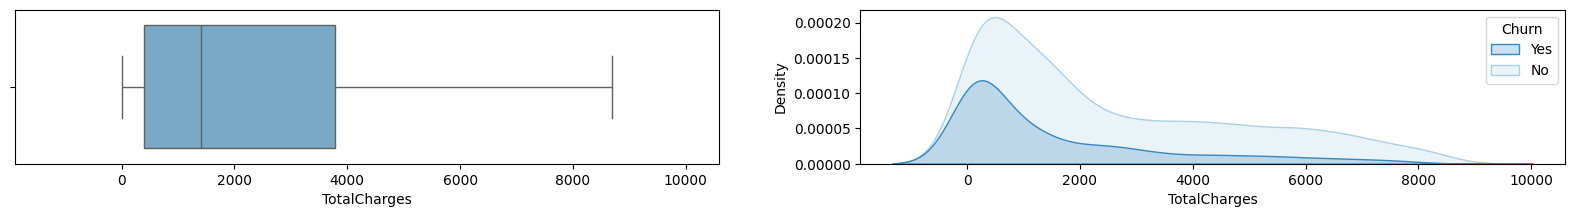

In [28]:
from matplotlib import rcParams

for i in train_set.columns:
    if train_set[i].dtype != 'object':
        plt.figure()
    
        rcParams['figure.figsize'] = (20, 2)

        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel=i, ylabel='Density')    
        sns.boxplot(x=train_set[i], ax=ax_box, linewidth=1.0, palette='Blues')
        sns.kdeplot(x=train_set[i], ax=ax_kde, fill=True, palette='Blues_r', hue='Churn', data=train_set)
    
        plt.show()

rcParams['figure.figsize'] = (20, 10)

## Lets show the relation between our continous data & categorical data

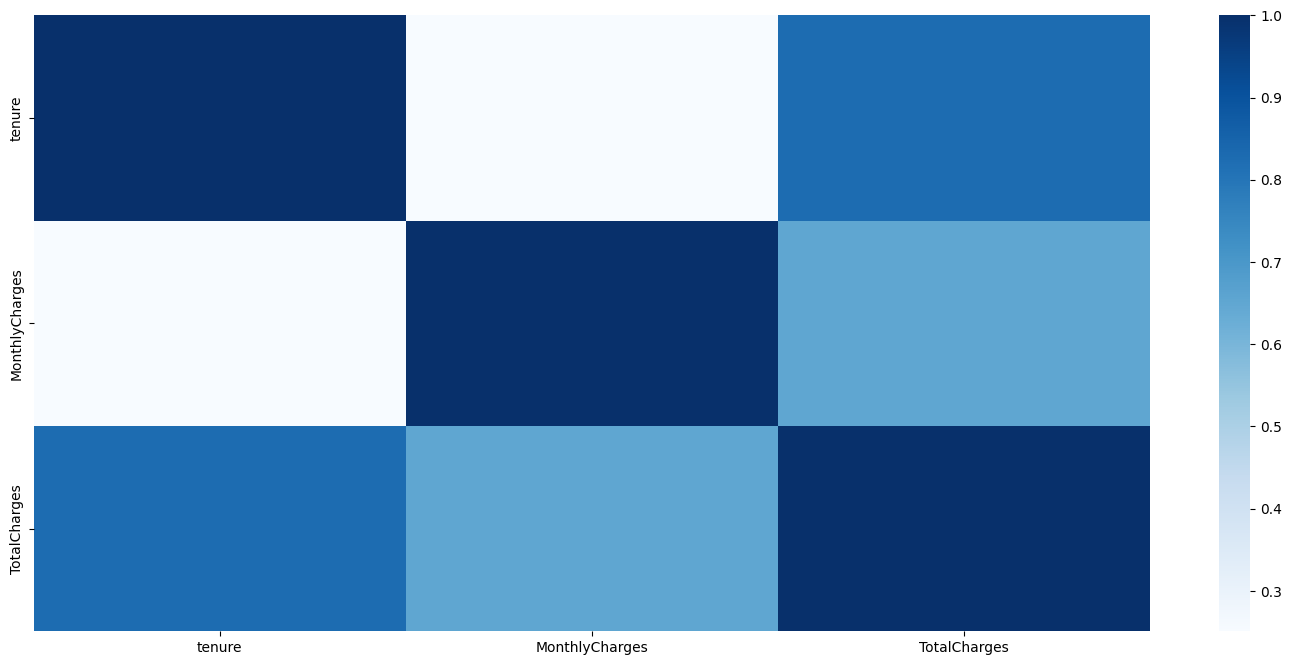

In [29]:
numeric_cols = train_set.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(numeric_cols.corr(), annot=False, cmap='Blues', cbar=True)
plt.show()

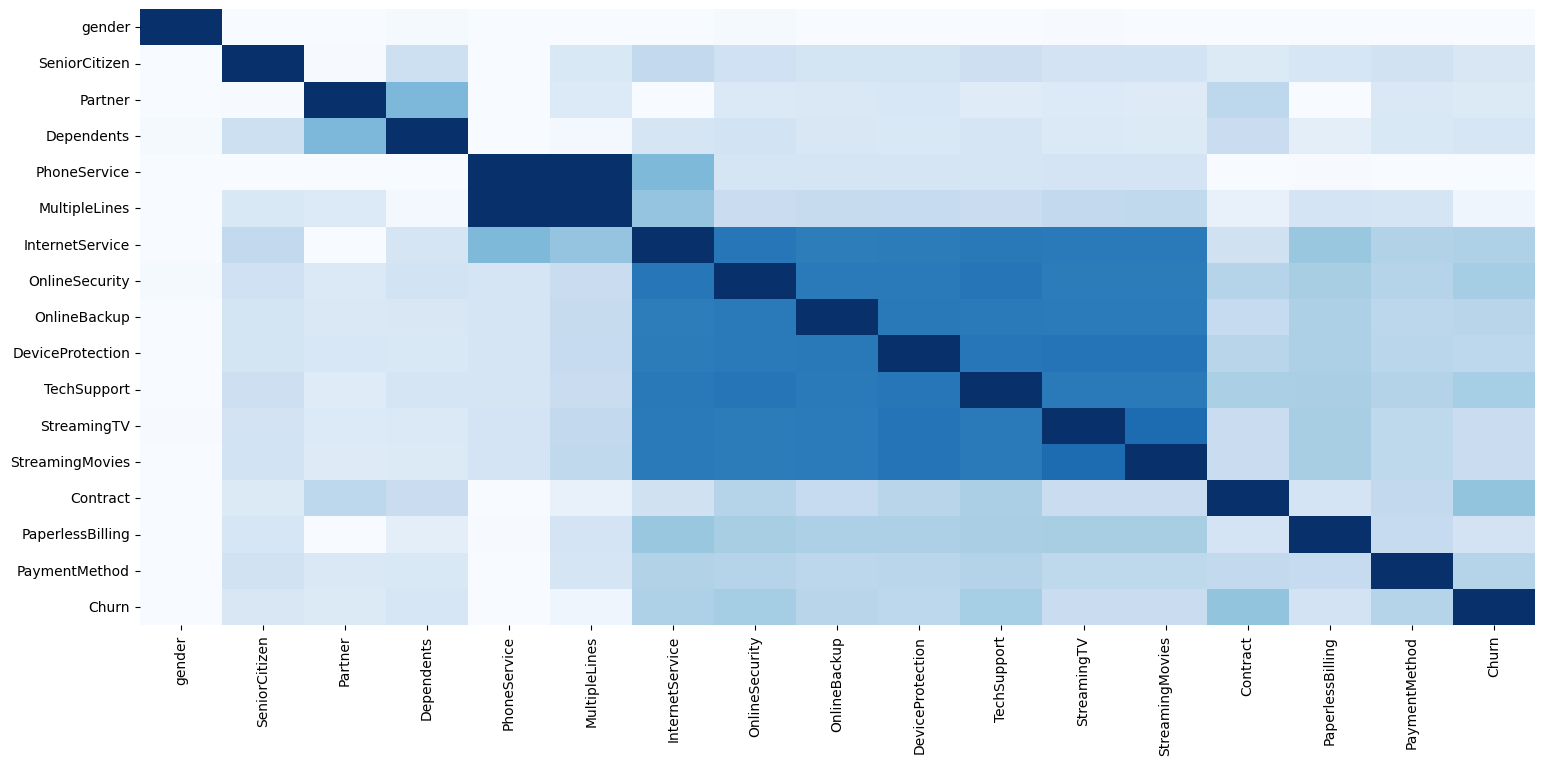

In [30]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_cols = train_set.select_dtypes(include='object')

cramers_v_matrix = pd.DataFrame(index=categorical_cols.columns, columns=categorical_cols.columns)

for col1 in categorical_cols.columns:
    for col2 in categorical_cols.columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_cols[col1], categorical_cols[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(cramers_v_matrix, annot=False, cmap='Blues', cbar=False)
plt.show()

## There is high corr between columns but it is not useful

## <br> after ploting the data there is nothing we can do in the data <br>

# <hr><br> Time to processing the data <br><br>

In [31]:
train_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3276,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25,Yes
6266,Male,1,No,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30,Yes
1324,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
5201,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60,No
4080,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,No


### All Categorical columns :


In [32]:
cat_cols = []

for i in train_set.columns:
    if train_set[i].dtype == 'object':
        cat_cols.append(i)

print(cat_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### I will remove `SeniorCitizen` as it is already encoded and `Churn` as it is our dependent variable

In [33]:
cat_cols.remove('SeniorCitizen')
cat_cols.remove('Churn')

## Function for cleaning `churn` feature

In [34]:
def cleaning_churn(df):
    """
    input is a dataframe where it will replace yes in churn by 1 and no by 0
    """
    df['Churn'].replace({'Yes':1,'No':0},inplace=True)
    print('Unique data is : ', df['Churn'].unique())

In [35]:
cleaning_churn(y_train)

Unique data is :  [1 0]


## Now dealing with continous data :
### Continous columns are :
> - tenure <br><br>
> - MonthlyCharges <br><br>
> - TotalCharges

In [36]:
X_train[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.242495
MonthlyCharges   -0.219775
TotalCharges      0.965658
dtype: float64

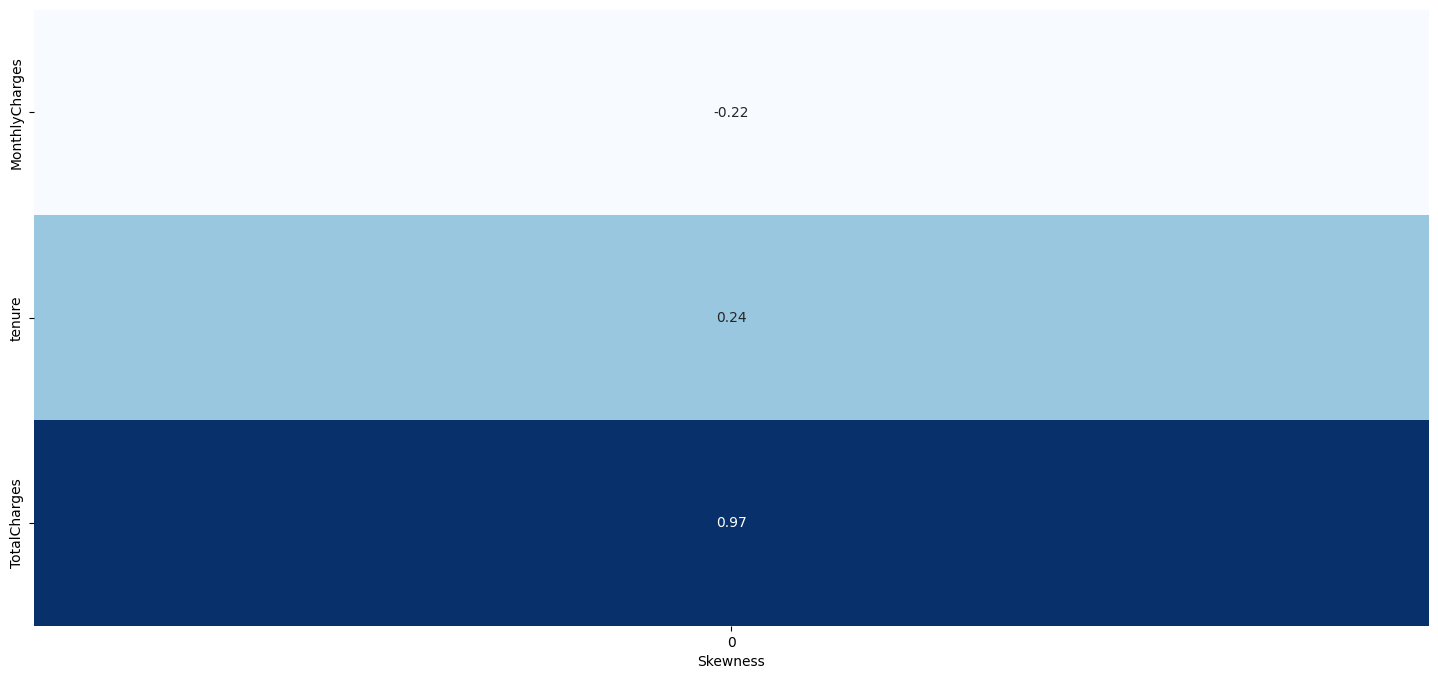

In [37]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(X_train[['tenure','MonthlyCharges','TotalCharges']].skew().sort_values(ascending=True)),
            cmap='Blues',annot=True,cbar=False)
plt.xlabel('Skewness')

plt.show()

### For Continous data I will use `standard scaler` because there is skewness in data ('TotalCharges')

In [38]:
X_train[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
3276,4,79.15,317.25
6266,33,83.85,2716.30
1324,4,20.35,76.35
5201,9,19.90,164.60
4080,29,26.10,692.55


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
    
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,Female,0,No,No,-1.162519,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.474849,-0.868118
6266,Male,1,No,No,0.026315,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),0.630667,0.191249
1324,Female,0,Yes,Yes,-1.162519,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,-1.474544,-0.974494
5201,Male,0,No,No,-0.957548,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,-1.489463,-0.935525
4080,Female,0,Yes,Yes,-0.137662,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,-1.283915,-0.702394


## Now dealing with categorical data :
### I will use ordinal encoder (here if we used one hot encoder there will be too many features)

In [40]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_train[cat_cols] = enc.fit_transform(X_train[cat_cols])

In [41]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,0.0,0,0.0,0.0,-1.162519,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.474849,-0.868118
6266,1.0,1,0.0,0.0,0.026315,1.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.630667,0.191249
1324,0.0,0,1.0,1.0,-1.162519,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-1.474544,-0.974494
5201,1.0,0,0.0,0.0,-0.957548,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-1.489463,-0.935525
4080,0.0,0,1.0,1.0,-0.137662,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,-1.283915,-0.702394


In [42]:
y_train.head()

,Churn
3276,1
6266,1
1324,1
5201,0
4080,0


<br><br>
# OK !!.. Finally My train data is ready 

<br><br>
<br><br>


# I have to apply same functions on test... but let's take a look on our data :)

# Functions we need to apply on test :
> - cleaning_total_charges(X_test) <br><br>
> - cleaning_churn(y_test)<br><br>
> - scale transform X_test <br><br>
> - transform X_test[cat_cols]

In [43]:
cleaning_churn(y_test)
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test[cat_cols] = enc.transform(X_test[cat_cols])

Unique data is :  [1 0]


In [48]:
yes_churn = train_set[train_set['Churn'] == 'Yes']
no_churn = train_set[train_set['Churn'] == 'No']

print('Number of data with churn = 1 is :',len(yes_churn))
print('\nNumber of data with churn = 0 is :',len(no_churn))

Number of data with churn = 1 is : 1505

Number of data with churn = 0 is : 4111


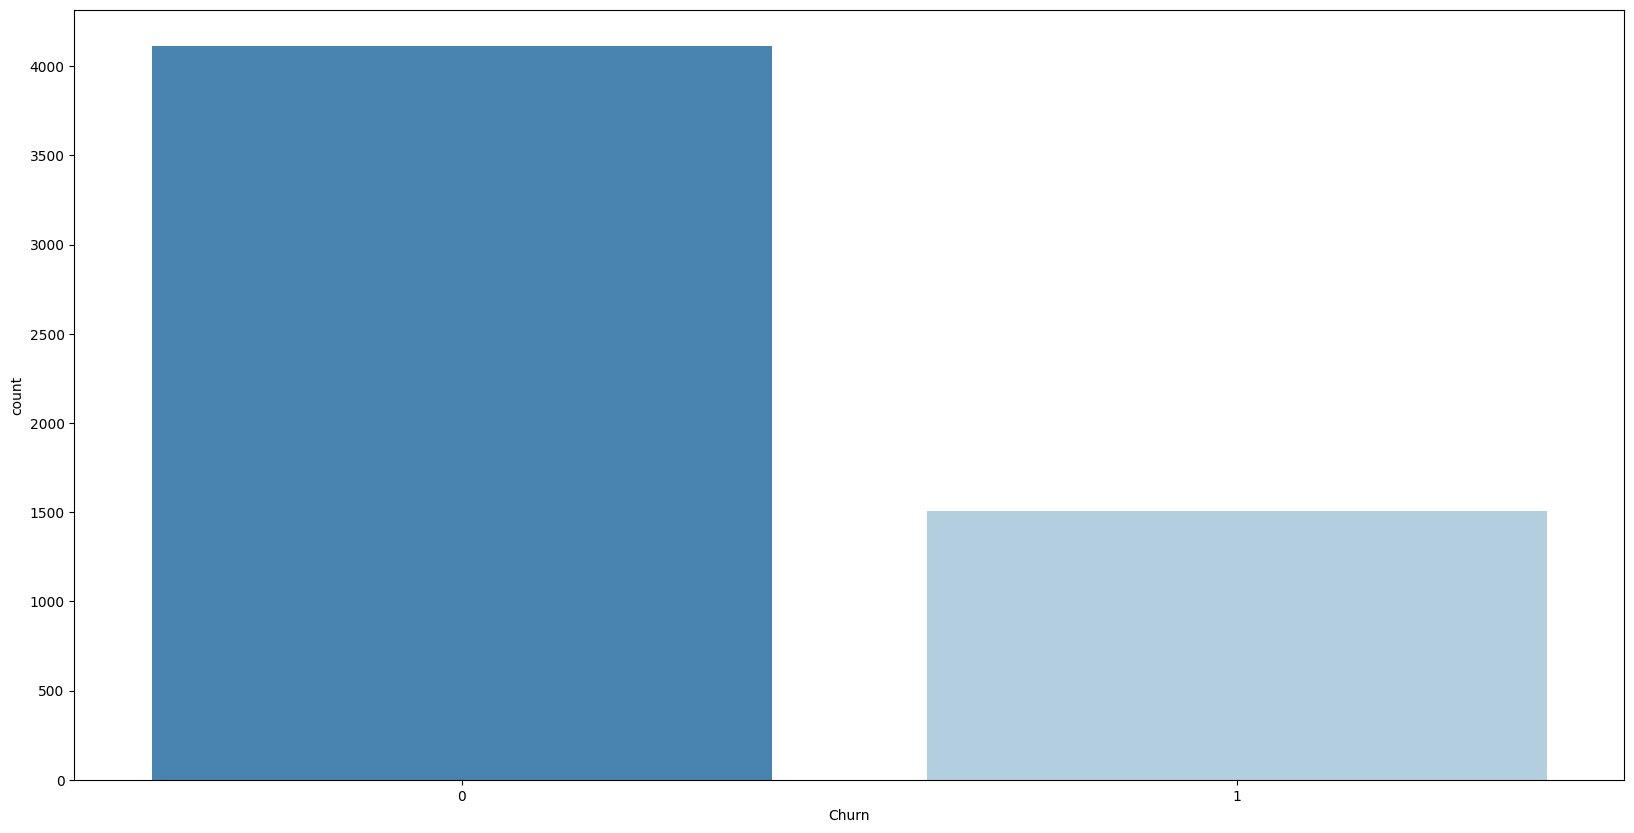

In [46]:
sns.countplot(x='Churn',data=y_train,palette='Blues_r')
plt.show()

## We can see from first plot that number of churn = no is too much more than churn = yes... So we will under sample the data.

### Look at `train_set` again... I will get index from it when churn='yes' and when churn='no'

### Then I will make same number of churn of (yes and no) enter the model..

### So I will make the data which enters the model as 1505 row churn=1 and 1505 churn=0

In [50]:
np.random.seed(10)
n = len(yes_churn)  
index = np.random.choice(no_churn.index,n ,replace=False)  

print('Number of rows containing churn=0 entering the model is :',no_churn.loc[index].shape[0])
print('Number of rows containing churn=1 entering the model is :',yes_churn.shape[0])

Number of rows containing churn=0 entering the model is : 1505
Number of rows containing churn=1 entering the model is : 1505


## Appending the two arrays together : 

In [51]:
new_index = np.append(index,yes_churn.index)
print(len(new_index))

3010


## Modifing data entering the model :

In [52]:
X_train = X_train.loc[new_index]
y_train = y_train.loc[new_index]

## Making sure that number of churn=0 equals churn=1 :

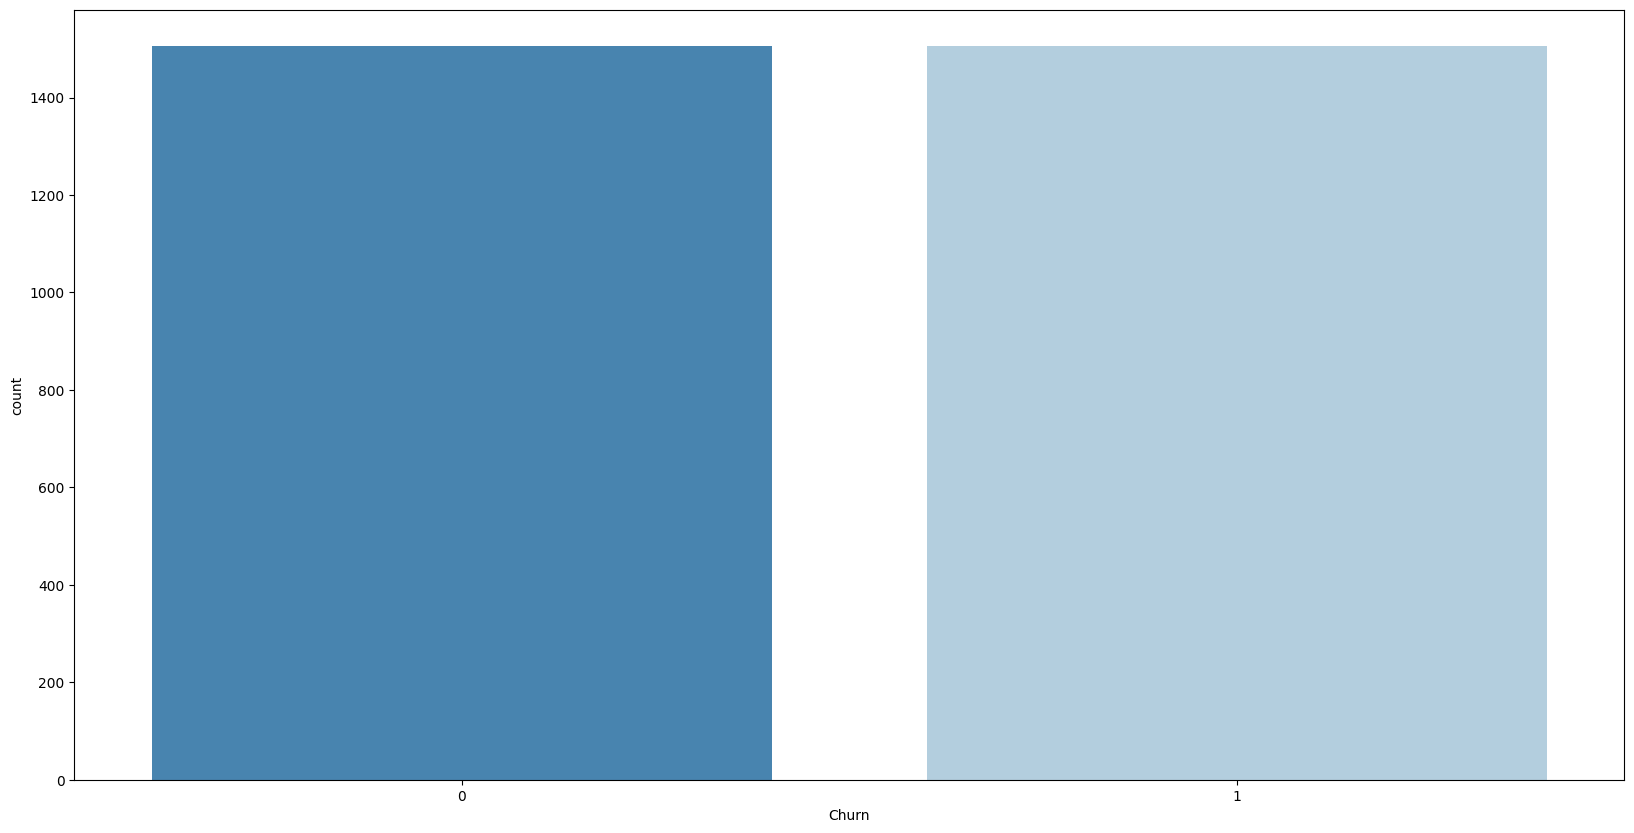

In [53]:
sns.countplot(x='Churn',data=y_train,palette='Blues_r')
plt.show()

# Now my data is ready

<h1><center><center><h1><h1><center><span style="color:#2189b5">Time To Machine Learning Model</span><center><h1>

### I will run lazypredict to show best models on my data :

In [58]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.40it/s]

[LightGBM] [Info] Number of positive: 1505, number of negative: 1505
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 3010, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.74               0.76     0.76      0.75   
LogisticRegression                 0.74               0.76     0.76      0.75   
LinearSVC                          0.73               0.76     0.76      0.75   
AdaBoostClassifier                 0.74               0.76     0.76      0.75   
RidgeClassif

## Now it is time to show the F1 score for models on heatmap:

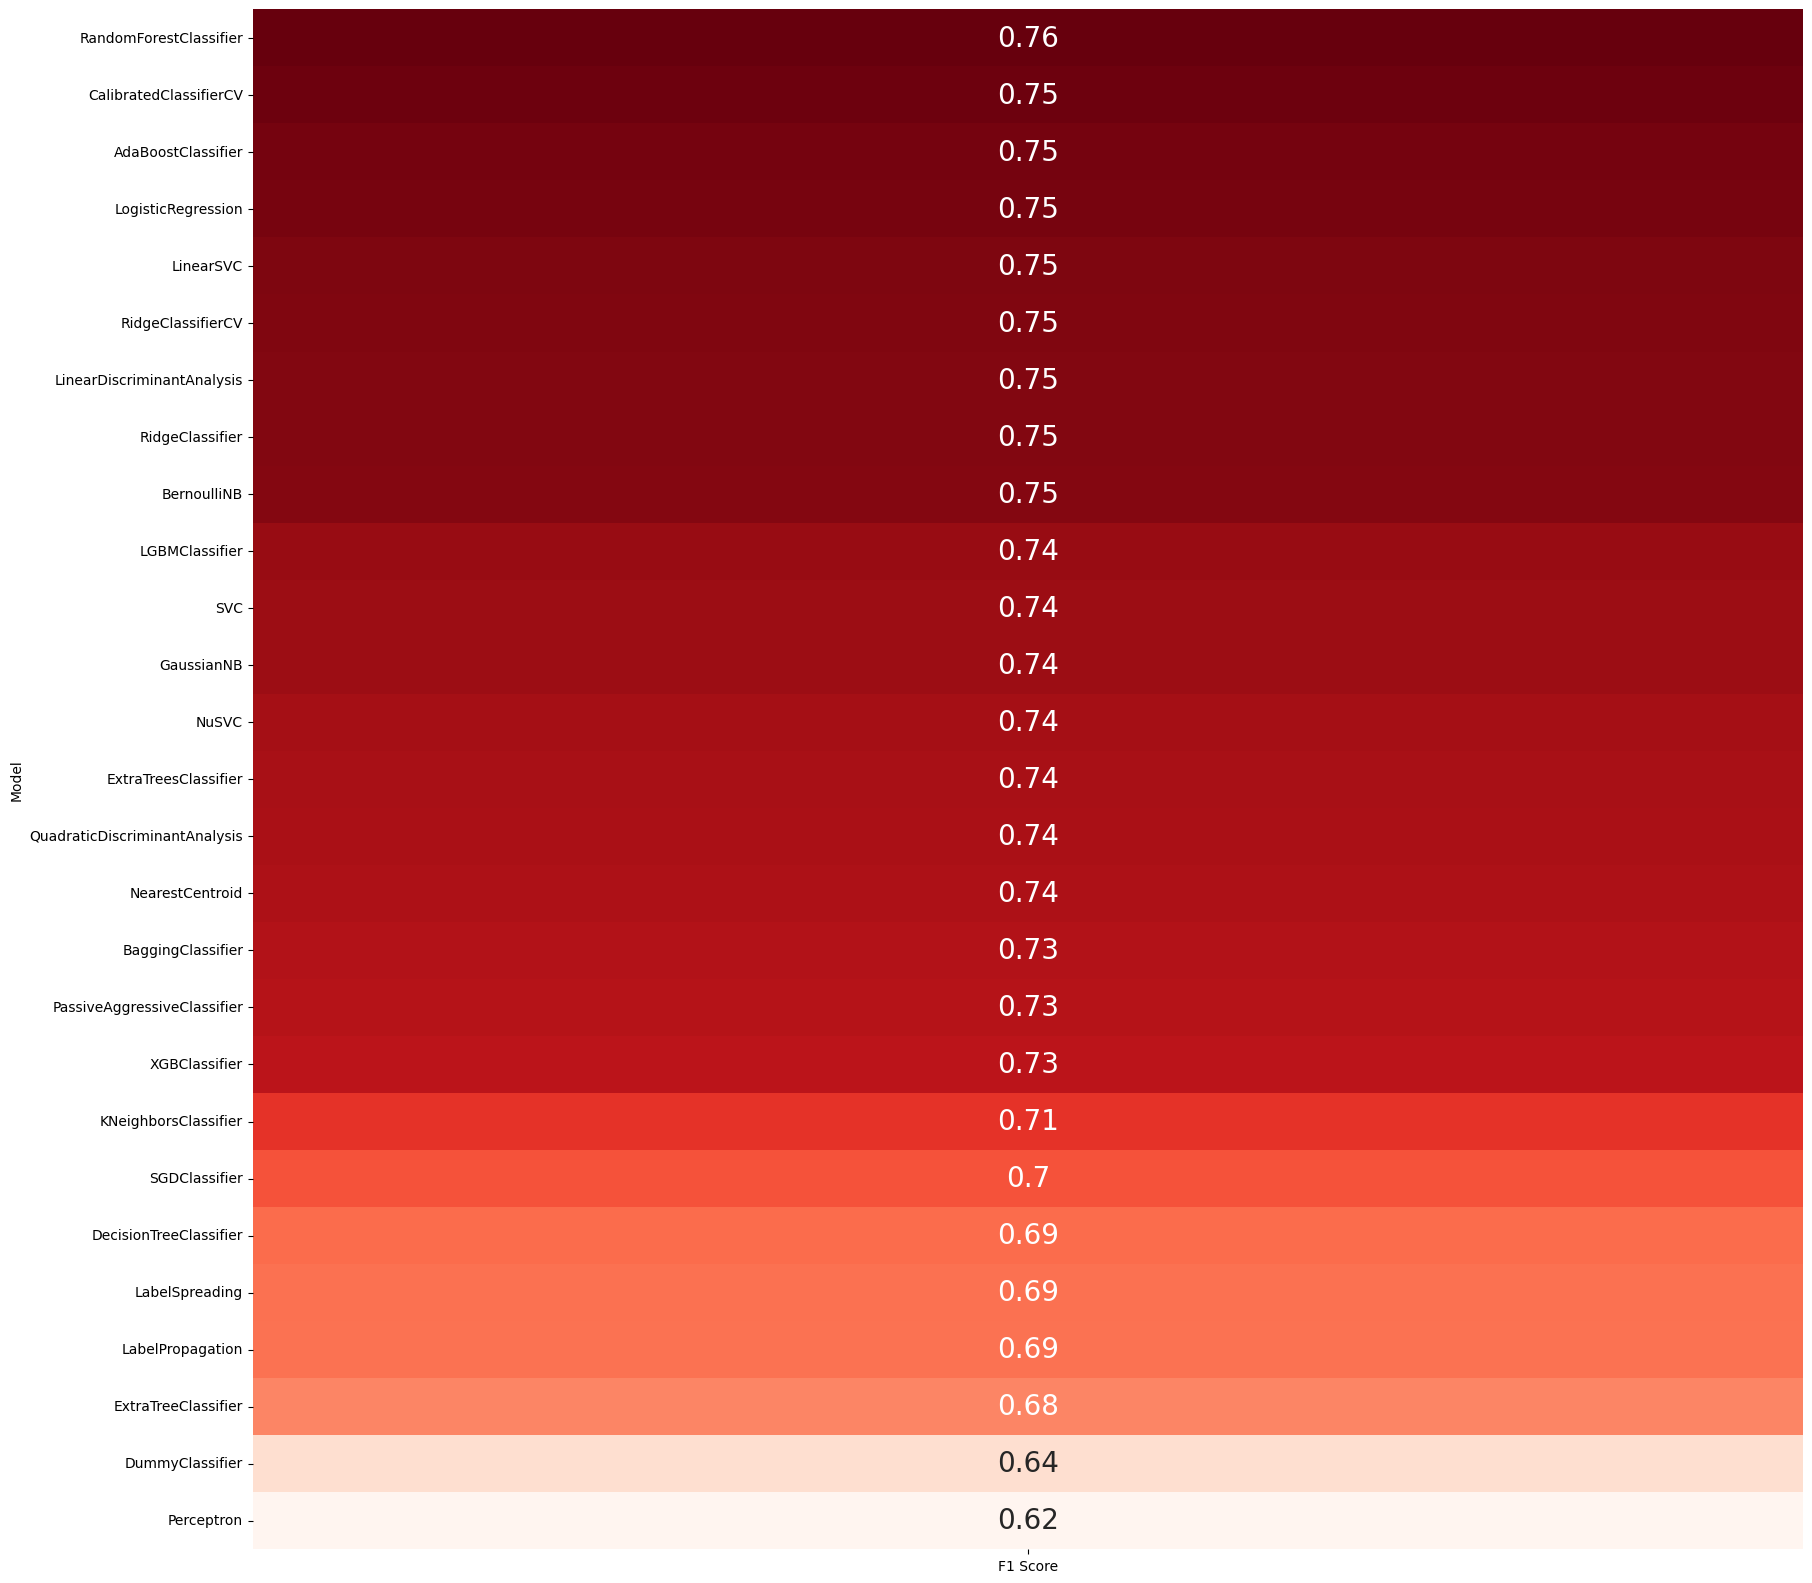

In [59]:
plt.figure(figsize=(20, 20))

sns.heatmap(pd.DataFrame(models['F1 Score']).sort_values(by='F1 Score',ascending=False),
            cmap='Reds',annot=True,cbar=False,annot_kws={"size": 20})

plt.show()

## Let's see our models :

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [61]:
def model_accuracies(y_pred, y_test):
    """
    function for getting accuracies
    """
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    print("ROC AUC Score:",roc_auc_score(y_test, y_pred))

### Logestic regression :

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7359430604982207
Confusion Matrix:
 [[749 304]
 [ 67 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1053
           1       0.48      0.81      0.61       352

    accuracy                           0.74      1405
   macro avg       0.70      0.76      0.70      1405
weighted avg       0.81      0.74      0.75      1405

ROC AUC Score: 0.7604800677717344


### Random Forest :

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7359430604982207
Confusion Matrix:
 [[764 289]
 [ 82 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1053
           1       0.48      0.77      0.59       352

    accuracy                           0.74      1405
   macro avg       0.69      0.75      0.70      1405
weighted avg       0.80      0.74      0.75      1405

ROC AUC Score: 0.7462957567124234


### SVC :

In [64]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_accuracies(y_pred, y_test)

Accuracy: 0.7316725978647687
Confusion Matrix:
 [[753 300]
 [ 77 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1053
           1       0.48      0.78      0.59       352

    accuracy                           0.73      1405
   macro avg       0.69      0.75      0.70      1405
weighted avg       0.80      0.73      0.75      1405

ROC AUC Score: 0.7481748575498576


## I will choose Logestic regression as my model

### Now hyper tunning my model :

In [65]:
LR = LogisticRegression(multi_class= 'ovr', max_iter= 1000, n_jobs= -1)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LR, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 2/5] END C=0.001, penalty

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
LR = LogisticRegression(max_iter= 1500, n_jobs= -1, C = 100, solver = 'liblinear'
                        ,penalty = 'l1').fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [67]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions()
cnf_matrix

array([[749, 304],
       [ 67, 285]], dtype=int64)

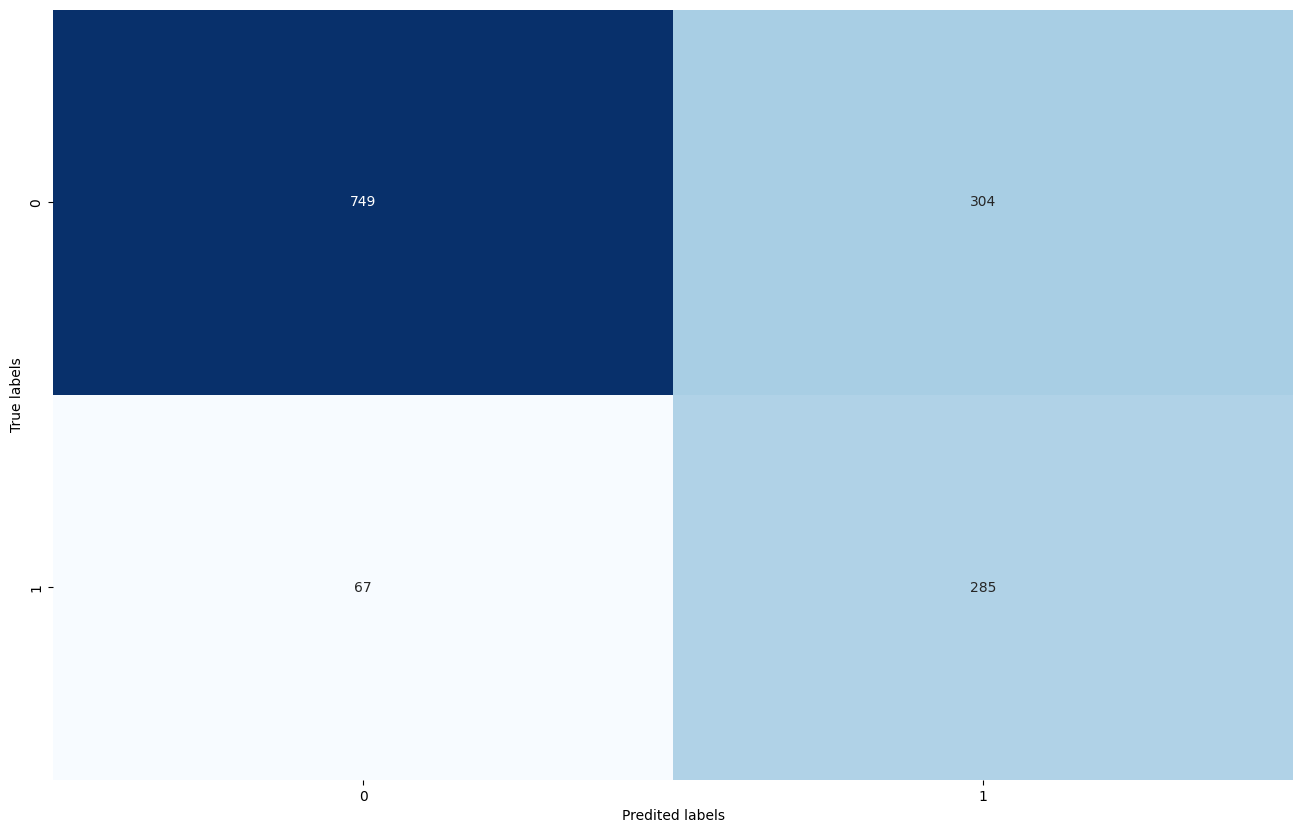

In [68]:
plt.figure(figsize=(16, 10))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,fmt='.3g',cbar=False)

plt.xlabel('Predited labels')
plt.ylabel('True labels')
plt.show()